In [1]:
import os
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Define the data directory
data_dir = r'C:\Users\haris\AI\ML\Projects\Data\Cars Dataset'

# Define the image size and batch size
img_size = (224, 224)
batch_size = 32

# Function to get images and labels
def load_and_preprocess_data(subdir_name):
    # Load and preprocess the training data
    images = []
    labels = []

    # Iterate through each subdirectory (class)
    class_folders = os.listdir(os.path.join(data_dir, subdir_name))
    num_classes = len(class_folders)

    for class_index, class_folder in enumerate(class_folders):
        class_path = os.path.join(data_dir, subdir_name, class_folder)
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            img = load_img(image_path, target_size = img_size)
            img_array = img_to_array(img)
            img_array /= 255.0  # Normalize pixel values to [0, 1]
            images.append(img_array)
            labels.append(class_index)
    images = np.array(images)
    labels = to_categorical(labels, num_classes=num_classes)


    return images, labels, num_classes

In [3]:
images, labels, num_classes = load_and_preprocess_data('train')
train_images, valid_images, train_labels, valid_labels = train_test_split(images, labels, test_size=0.2, random_state=42)


Epoch 1/10
84/84 [==============================] - 12s 60ms/step - loss: 0.8618 - accuracy: 0.7255 - val_loss: 0.5080 - val_accuracy: 0.8182
Epoch 2/10
84/84 [==============================] - 4s 42ms/step - loss: 0.3446 - accuracy: 0.8847 - val_loss: 0.6409 - val_accuracy: 0.7973
Epoch 3/10
84/84 [==============================] - 4s 42ms/step - loss: 0.1998 - accuracy: 0.9418 - val_loss: 0.4006 - val_accuracy: 0.8718
Epoch 4/10
84/84 [==============================] - 4s 43ms/step - loss: 0.1053 - accuracy: 0.9731 - val_loss: 0.3513 - val_accuracy: 0.8987
Epoch 5/10
84/84 [==============================] - 4s 42ms/step - loss: 0.0609 - accuracy: 0.9881 - val_loss: 0.3784 - val_accuracy: 0.8838
Epoch 6/10
84/84 [==============================] - 4s 42ms/step - loss: 0.0340 - accuracy: 0.9959 - val_loss: 0.3616 - val_accuracy: 0.8912
Epoch 7/10
84/84 [==============================] - 4s 42ms/step - loss: 0.0189 - accuracy: 0.9989 - val_loss: 0.3951 - val_accuracy: 0.8942
Epoch 8/10
8

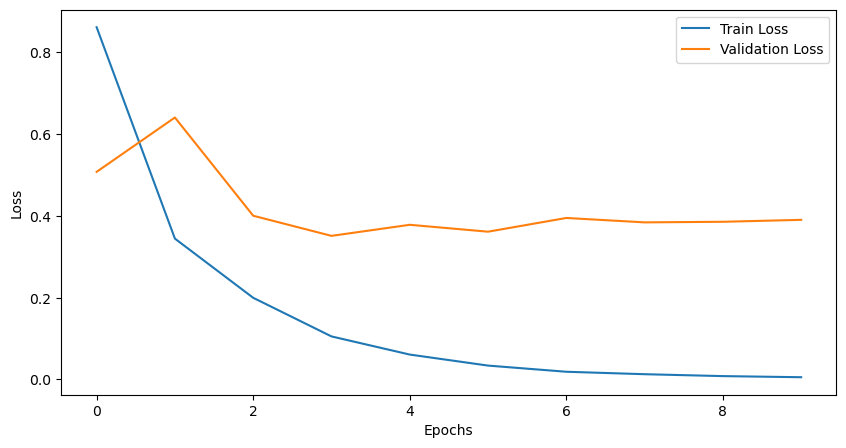

In [4]:
# Load the MobileNetV2 pre-trained model
base_model = MobileNetV2(weights='imagenet', include_top=False)

# Add custom classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and monitor validation loss
history = model.fit(
    train_images,
    train_labels,
    validation_data=(valid_images, valid_labels),  # Use validation set
    batch_size=batch_size,
    epochs=10,  # You can adjust the number of epochs as needed
)

# Plot train and validation loss curves
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
# Testing the trained model on the test dataset
test_images, test_labels, num_classes = load_and_preprocess_data('test')
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

26/26 [==============================] - 1s 32ms/step - loss: 0.3094 - accuracy: 0.9151
Test Loss: 0.3094072937965393
Test Accuracy: 0.9151291251182556
